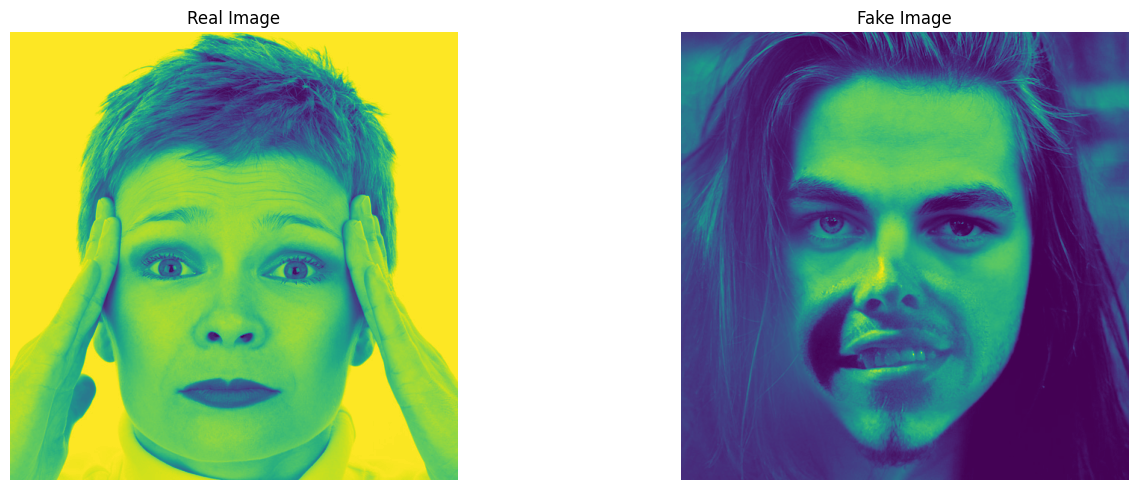

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image_0 = cv2.imread(r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\raw\real_and_fake_face_detection\real_and_fake_face\training_real\real_00002.jpg')
image_1 = cv2.imread(r'C:\Users\tanbe\OneDrive\Desktop\Works\HWUM\FYP\fakefacedetect\data\raw\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_15_0011.jpg')

# Convert BGR to RGB for correct color representation
image_0 = cv2.cvtColor(image_0, cv2.COLOR_BGR2GRAY)
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Real Image
axs[0].imshow(image_0)
axs[0].set_title('Real Image')
axs[0].axis('off')  # Hide axes ticks

# Fake Image
axs[1].imshow(image_1)
axs[1].set_title('Fake Image')
axs[1].axis('off')  # Hide axes ticks

plt.tight_layout()
plt.show()


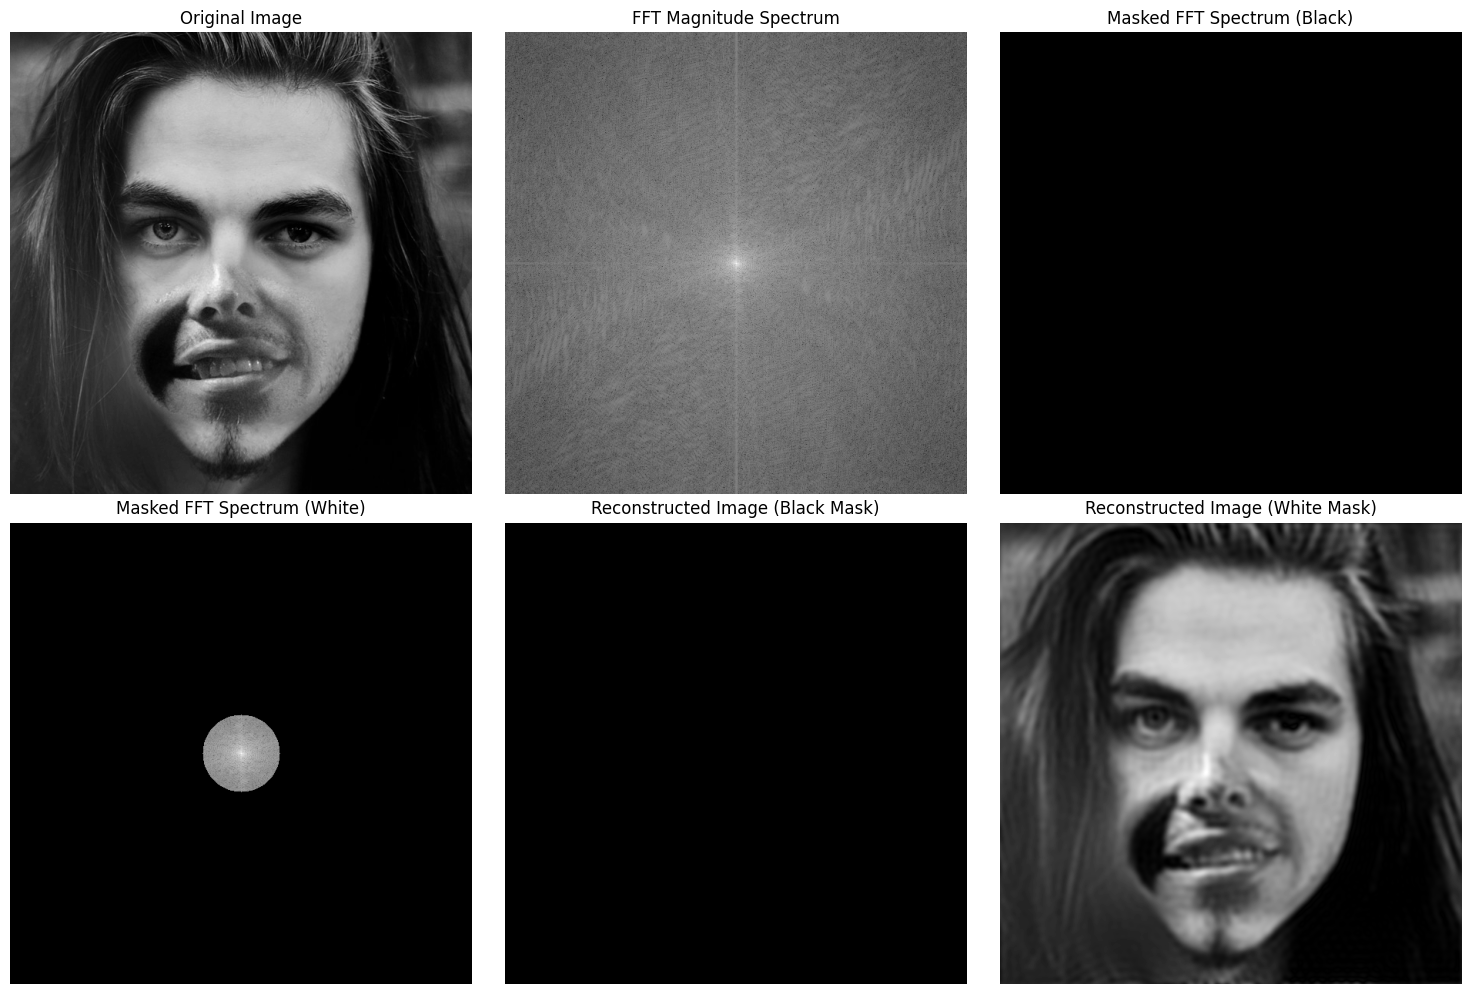

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_circular_mask(h, w, radius, invert=False, color="black"):
    """
    Create a circular mask with a specified radius and color.
    
    Args:
        h (int): Height of the mask.
        w (int): Width of the mask.
        radius (int): Radius of the circle.
        invert (bool): If True, inverts the mask.
        color (str): Color for the mask. Options are "black" or "white".
        
    Returns:
        np.ndarray: Circular mask.
    """
    center = (int(w / 2), int(h / 2))
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    
    # Create the mask with the specified color
    mask = (dist_from_center <= radius).astype(np.uint8)
    
    if invert:
        mask = ~mask
    
    if color == "black":
        mask = mask * 0  # Masked area is black
    elif color == "white":
        mask = mask * 1  # Masked area is white
    else:
        raise ValueError("Color must be 'black' or 'white'")
    
    return mask

def apply_fft_with_mask(img, mask_radius, invert=False, color="black"):
    """
    Apply FFT to an image, mask it, and return the manipulated frequency domain image.
    
    Args:
        img (np.ndarray): Grayscale image to process.
        mask_radius (int): Radius of the circular mask.
        invert (bool): Whether to invert the mask.
        color (str): Color of the circular mask, either "black" or "white".
        
    Returns:
        tuple: FFT magnitude spectrum, masked spectrum, and reconstructed image after IFFT.
    """
    # Perform FFT and shift to center
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    
    # Create circular mask
    h, w = img.shape
    mask = create_circular_mask(h, w, mask_radius, invert=invert, color=color)
    
    # Apply the mask to the shifted FFT
    masked_fshift = fshift * mask
    
    # Inverse FFT to get the filtered image
    f_ishift = np.fft.ifftshift(masked_fshift)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    
    # Compute masked magnitude spectrum
    masked_magnitude_spectrum = np.log(np.abs(masked_fshift) + 1)
    
    return magnitude_spectrum, masked_magnitude_spectrum, img_back

radius = 50  # Adjust the radius as needed

# Apply FFT with a black circular mask
magnitude_spectrum, masked_magnitude_spectrum_black, img_back_black = apply_fft_with_mask(image_1, radius, color="black")

# Apply FFT with a white circular mask
_, masked_magnitude_spectrum_white, img_back_white = apply_fft_with_mask(image_1, radius, color="white")

# Plot the results
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Original image
ax[0, 0].imshow(image_1, cmap="gray")
ax[0, 0].set_title("Original Image")
ax[0, 0].axis("off")

# FFT magnitude spectrum
ax[0, 1].imshow(magnitude_spectrum, cmap="gray")
ax[0, 1].set_title("FFT Magnitude Spectrum")
ax[0, 1].axis("off")

# Masked magnitude spectrum (black)
ax[0, 2].imshow(masked_magnitude_spectrum_black, cmap="gray")
ax[0, 2].set_title("Masked FFT Spectrum (Black)")
ax[0, 2].axis("off")

# Masked magnitude spectrum (white)
ax[1, 0].imshow(masked_magnitude_spectrum_white, cmap="gray")
ax[1, 0].set_title("Masked FFT Spectrum (White)")
ax[1, 0].axis("off")

# Reconstructed image from black mask
ax[1, 1].imshow(img_back_black, cmap="gray")
ax[1, 1].set_title("Reconstructed Image (Black Mask)")
ax[1, 1].axis("off")

# Reconstructed image from white mask
ax[1, 2].imshow(img_back_white, cmap="gray")
ax[1, 2].set_title("Reconstructed Image (White Mask)")
ax[1, 2].axis("off")

plt.tight_layout()
plt.show()


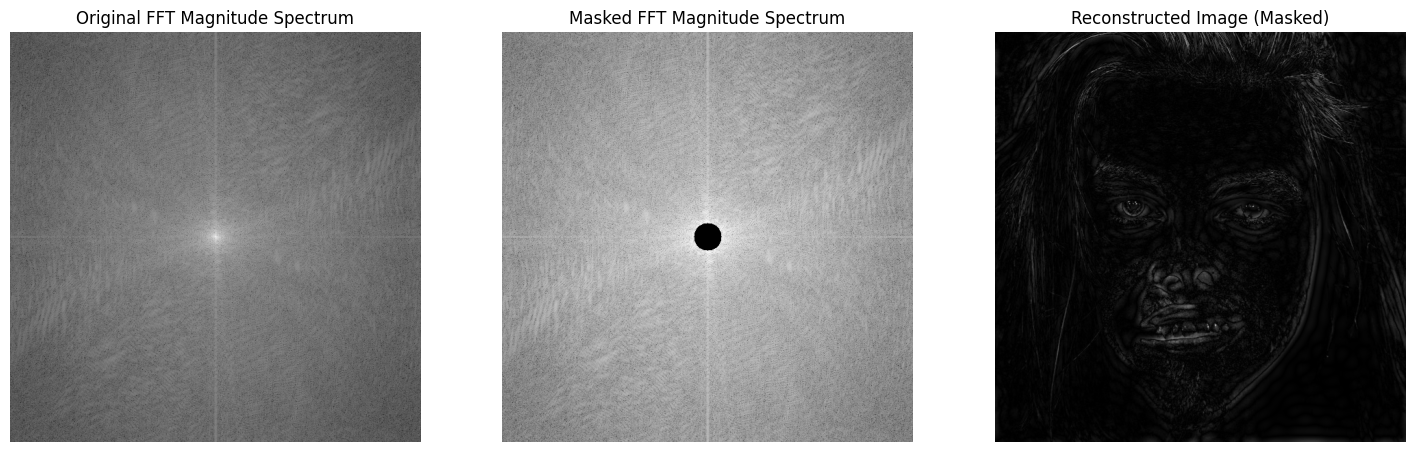

[[6.41999493 5.40398174 6.53396099 ... 6.58613408 6.53396099 5.40398174]
 [5.77334297 6.28429273 6.3650907  ... 5.61735122 5.64472798 6.12495775]
 [5.08317535 6.13768789 6.16567989 ... 6.650928   5.63799299 4.02342732]
 ...
 [6.59834541 6.4488428  5.86007488 ... 6.66198889 6.22612343 4.52669525]
 [5.08317535 4.02342732 5.63799299 ... 6.05421865 6.16567989 6.13768789]
 [5.77334297 6.12495775 5.64472798 ... 6.17283652 6.3650907  6.28429273]]


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_circular_mask(h, w, radius, invert=False):
    """
    Create a circular mask with a specified radius.
    
    Args:
        h (int): Height of the mask.
        w (int): Width of the mask.
        radius (int): Radius of the circle.
        invert (bool): If True, inverts the mask.
        
    Returns:
        np.ndarray: Circular mask.
    """
    center = (int(w / 2), int(h / 2))
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

    mask = dist_from_center <= radius
    if invert:
        mask = ~mask
    return mask.astype(np.uint8)

def apply_fft_with_mask(img, mask_radius, invert=False):
    """
    Apply FFT to an image, mask it, and return the manipulated frequency domain image.
    
    Args:
        img (np.ndarray): Grayscale image to process.
        mask_radius (int): Radius of the circular mask.
        invert (bool): Whether to invert the mask.
        
    Returns:
        tuple: FFT magnitude spectrum, masked spectrum, and reconstructed image after IFFT.
    """
    # Perform FFT and shift to center
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    
    # Create circular mask
    h, w = img.shape
    mask = create_circular_mask(h, w, mask_radius, invert=invert)
    
    # Apply the mask to the shifted FFT
    masked_fshift = fshift * mask
    
    # Inverse FFT to get the filtered image
    f_ishift = np.fft.ifftshift(masked_fshift)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    
    # Compute masked magnitude spectrum
    masked_magnitude_spectrum = np.log(np.abs(masked_fshift) + 1)
    
    return magnitude_spectrum, masked_magnitude_spectrum, img_back

# Load an example image in grayscale
# image = cv2.imread('path_to_image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply FFT with a central mask to focus on textures (set radius based on your texture size focus)
magnitude_spectrum, masked_spectrum, reconstructed_image = apply_fft_with_mask(image_1, mask_radius=20, invert=True)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(magnitude_spectrum, cmap='gray')
axs[0].set_title('Original FFT Magnitude Spectrum')
axs[0].axis('off')

axs[1].imshow(masked_spectrum, cmap='gray')
axs[1].set_title('Masked FFT Magnitude Spectrum')
axs[1].axis('off')

axs[2].imshow(reconstructed_image, cmap='gray')
axs[2].set_title('Reconstructed Image (Masked)')
axs[2].axis('off')

plt.show()

print(masked_spectrum)

Chi-Square Distance: 43311.071438775485
Correlation: 0.9718381644541804
KL-Divergence: 0.10677821025685827


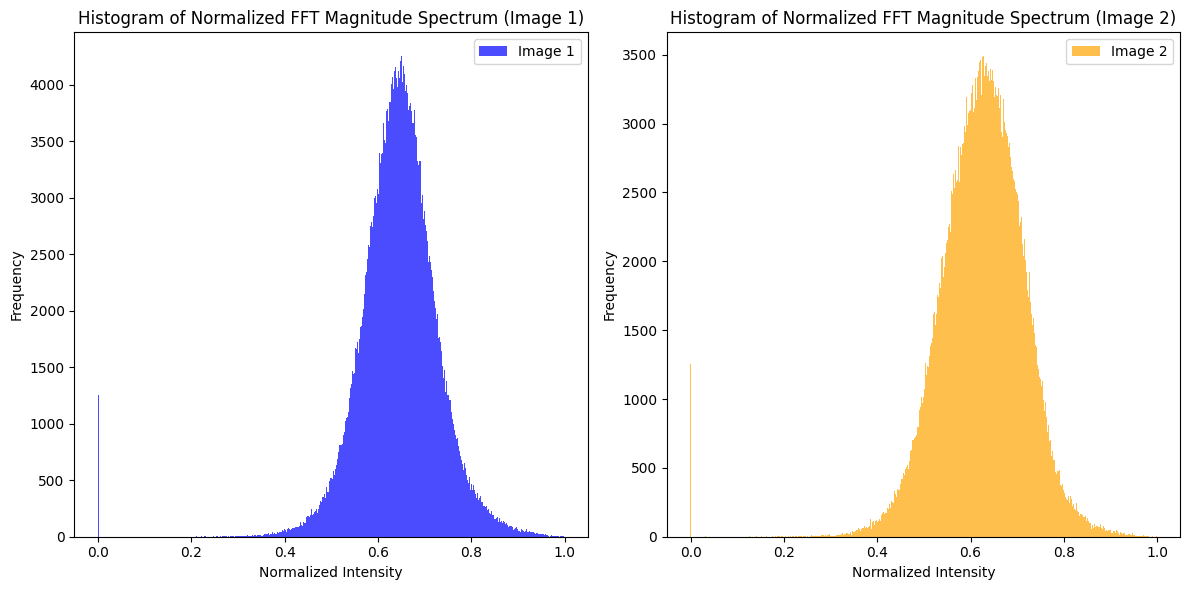

In [4]:
import numpy as np
import cv2
from scipy.spatial import distance

def normalize_spectrum(magnitude_spectrum):
    """
    Normalize the FFT magnitude spectrum to a range of [0, 1].
    
    Args:
        magnitude_spectrum (np.ndarray): FFT magnitude spectrum.
        
    Returns:
        np.ndarray: Normalized FFT magnitude spectrum.
    """
    norm_spectrum = (magnitude_spectrum - np.min(magnitude_spectrum)) / (np.max(magnitude_spectrum) - np.min(magnitude_spectrum))
    return norm_spectrum

def compare_histograms(hist1, hist2, method='chi-square'):
    """
    Compare two histograms using a specified method.
    
    Args:
        hist1 (np.ndarray): Histogram of the first image.
        hist2 (np.ndarray): Histogram of the second image.
        method (str): Method for comparison ('chi-square', 'correlation', 'kl-divergence').
        
    Returns:
        float: Distance or similarity measure between histograms.
    """
    if method == 'chi-square':
        return cv2.compareHist(hist1.astype('float32'), hist2.astype('float32'), cv2.HISTCMP_CHISQR)
    elif method == 'correlation':
        return cv2.compareHist(hist1.astype('float32'), hist2.astype('float32'), cv2.HISTCMP_CORREL)
    elif method == 'kl-divergence':
        return distance.jensenshannon(hist1, hist2)
    else:
        raise ValueError("Method not recognized. Use 'chi-square', 'correlation', or 'kl-divergence'.")

# Example usage:
# Assume `masked_spectrum_1` and `masked_spectrum_2` are the masked FFT magnitude spectrums of two images
magnitude_spectrum_0, masked_spectrum_0, reconstructed_image_0 = apply_fft_with_mask(image_0, mask_radius=20, invert=True)
magnitude_spectrum_1, masked_spectrum_1, reconstructed_image_1 = apply_fft_with_mask(image_1, mask_radius=20, invert=True)

norm_spectrum_1 = normalize_spectrum(masked_spectrum_0)
norm_spectrum_2 = normalize_spectrum(masked_spectrum_1)

bins=500

# Compute histograms of the normalized spectra
hist_1, bins_1 = np.histogram(norm_spectrum_1, bins, range=(0, 1))
hist_2, bins_2 = np.histogram(norm_spectrum_2, bins, range=(0, 1))

# Compare the histograms
chi_square_dist = compare_histograms(hist_1, hist_2, method='chi-square')
correlation = compare_histograms(hist_1, hist_2, method='correlation')
kl_divergence = compare_histograms(hist_1, hist_2, method='kl-divergence')

print(f"Chi-Square Distance: {chi_square_dist}")
print(f"Correlation: {correlation}")
print(f"KL-Divergence: {kl_divergence}")

# Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for Image 1
ax[0].bar(bins_1[:-1], hist_1, width=(bins_1[1] - bins_1[0]), color='blue', alpha=0.7, label="Image 1")
ax[0].set_title("Histogram of Normalized FFT Magnitude Spectrum (Image 1)")
ax[0].set_xlabel("Normalized Intensity")
ax[0].set_ylabel("Frequency")
ax[0].legend()

# Plot histogram for Image 2
ax[1].bar(bins_2[:-1], hist_2, width=(bins_2[1] - bins_2[0]), color='orange', alpha=0.7, label="Image 2")
ax[1].set_title("Histogram of Normalized FFT Magnitude Spectrum (Image 2)")
ax[1].set_xlabel("Normalized Intensity")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()
